<a href="https://colab.research.google.com/github/MuhammadIrzam447/visionCodes/blob/master/images_ferramenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/ferramenta/"
# images-train.tar.gz
# images-val.tar.gz

In [ ]:
import os
os.chdir(path)

In [ ]:
# import tarfile

# with tarfile.open('images-val.tar.gz', 'r:gz') as tar_ref:
#     tar_ref.extractall('validImages')

# Pre Processing

In [ ]:
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from PIL import Image

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
class FragmentaDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.dataset = datasets.ImageFolder(data_dir, transform=transform)
        self.num_classes = len(self.dataset.classes)

    # def __getitem__(self, index):
    #     image, label = self.dataset[index]
    #     return image, label
    def __getitem__(self, index):
        while True:
            try:
                image, label = self.dataset[index]
                return image, label
            except (UnidentifiedImageError, FileNotFoundError) as e:
                print(f"Error loading image at index {index}: {e}")
                index += 1
    def __len__(self):
        return len(self.dataset)

    def get_num_classes(self):
        return self.num_classes

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/ferramenta/trainingImages/images-train'
dataset = FragmentaDataset(data_dir)

In [ ]:
batch_size = 32
num_workers = 4
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
resnet = models.resnet50(pretrained=True)
resnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 239MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Fine Tuning

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
num_classes = dataset.get_num_classes()
print("Number of classes:", num_classes)

Number of classes: 52


In [ ]:
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, num_classes)

print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer and set the learning rate
learning_rate = 0.001
optimizer = optim.Adam(resnet.parameters(), lr=learning_rate)

# Set up the training loop
num_epochs = 15

for epoch in range(num_epochs):
    # Set the model to training mode
    resnet.train()
    
    running_loss = 0.0
    
    # Iterate over the data loader
    for images, labels in data_loader:
        # Move the images and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the running loss
        running_loss += loss.item() * images.size(0)
    
    # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(data_loader.dataset)
    
    # Print the epoch loss
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f}")

Epoch 1/15 Loss: 1.8943
Epoch 2/15 Loss: 1.1592
Epoch 3/15 Loss: 0.8728
Epoch 4/15 Loss: 0.6775
Epoch 5/15 Loss: 0.5777
Epoch 6/15 Loss: 0.4258
Epoch 7/15 Loss: 0.3211
Epoch 8/15 Loss: 0.2574
Epoch 9/15 Loss: 0.1999
Epoch 10/15 Loss: 0.1599
Epoch 11/15 Loss: 0.1309
Epoch 12/15 Loss: 0.1099
Epoch 13/15 Loss: 0.1064
Epoch 14/15 Loss: 0.0808
Epoch 15/15 Loss: 0.0895


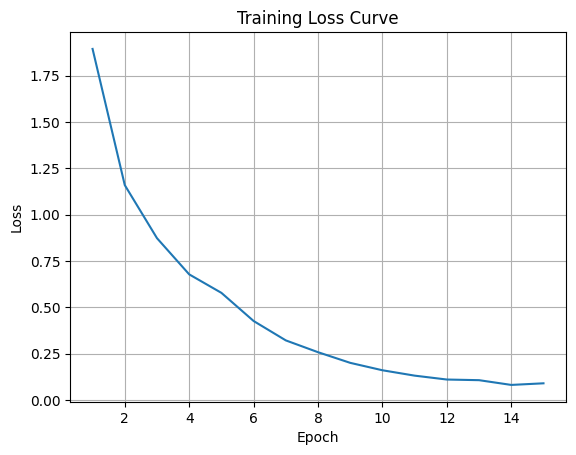

In [ ]:
# Collect the loss values over epochs
loss_values = [1.8943, 1.1592, 0.8728, 0.6775, 0.5777, 0.4258, 0.3211, 0.2574, 0.1999, 0.1599, 0.1309, 0.1099, 0.1064, 0.0808, 0.0895]

# Plot the loss curve
plt.plot(range(1, num_epochs+1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

# Validation

In [ ]:
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.dataset = datasets.ImageFolder(data_dir, transform=transform)

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, label

    def __len__(self):
        return len(self.dataset)

In [ ]:
valPath = "/content/drive/MyDrive/Colab Notebooks/ferramenta/validImages/images-val"
val_dataset = ValidationDataset(valPath)
validation_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
resnet.eval()

# Initialize variables for evaluation
total_samples = 0
correct_predictions = 0
true_positives = 0
false_positives = 0
false_negatives = 0

with torch.no_grad():
    for images, labels in validation_data_loader:
        # Move the images and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = resnet(images)
        
        # Get the predicted labels
        _, predicted_labels = torch.max(outputs, 1)
        
        # Update the total number of samples
        total_samples += labels.size(0)
        
        # Update the number of correct predictions
        correct_predictions += (predicted_labels == labels).sum().item()
        
        # Calculate the true positives, false positives, and false negatives
        true_positives += ((predicted_labels == 1) & (labels == 1)).sum().item()
        false_positives += ((predicted_labels == 1) & (labels == 0)).sum().item()
        false_negatives += ((predicted_labels == 0) & (labels == 1)).sum().item()

# Calculate the accuracy
accuracy = correct_predictions / total_samples

# Calculate the precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.8436
Precision: 0.9954
Recall: 0.9943
F1 Score: 0.9949


# Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
true_negatives = total_samples - correct_predictions - false_positives - false_negatives
confusion_matrix = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[1759    4]
 [   5  870]]


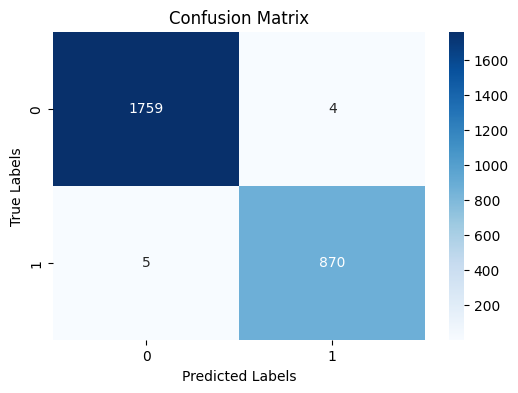

In [ ]:
plt.figure(figsize=(6, 4))
labels = []
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
class_names = data_loader.dataset.dataset.classes
class_performance = {"Precision": precision, "Recall": recall, "F1 Score": f1_score}
class_performance_df = pd.DataFrame(class_performance, index=range(len(class_names)))

print(class_names)

['@accessori_saldatore', '@accessori_trapano', '@armadio_cassettiera', '@bancale_cargo', '@banco', '@brugola', '@cacciavite_giravite_cercafase', '@carrello', '@carta-vetrata_carta-abrasiva', '@cassaforte', '@catena', '@cazzuola_frattone', '@cerniera_bandella', '@chiave-a-bussola_tubo', '@chiave_inglese_poligonale', '@chiavistello', '@chiodo_rivetto', '@colla_silicone', '@collare', '@coltello', '@estrattore', '@forbice_cesoia', '@lama_seghetto_sega', '@lame_sega_circolare', '@lima_grattuggia_raspa', '@livella', '@lucchetto', '@maniglia_pomello', '@martello_mazzetta_ascia', '@metro_flessometro', '@morsetto_strettoio', '@nastro', '@pennello', '@pinza_punzonatrice_giratubo', '@pinzetta', '@pistola', '@rubinetto_miscelatore_valvola', '@ruota', '@scaffale', '@scala', '@scalpello', '@sega-a-tazza', '@seghetto_sega', '@segnaletica', '@serratura_cilindro', '@spatola_raschietto', '@spazzola', '@staffa_squadretta', '@tassello', '@torcia-faro', '@vernice', '@vite_bullone']


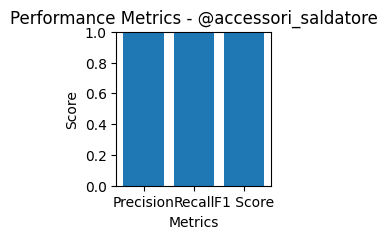

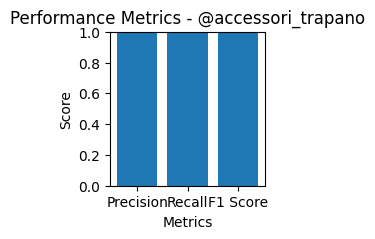

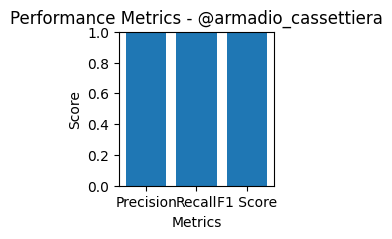

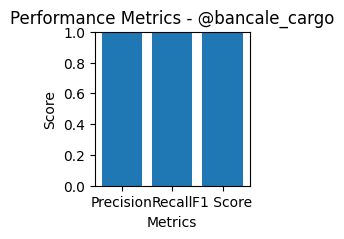

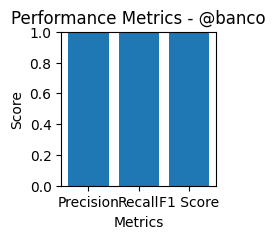

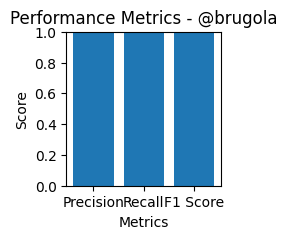

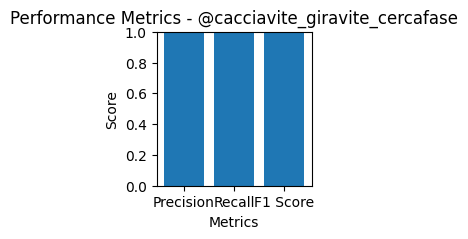

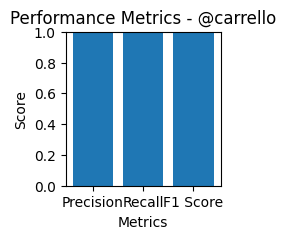

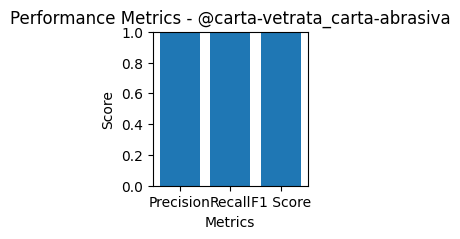

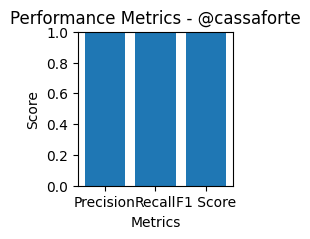

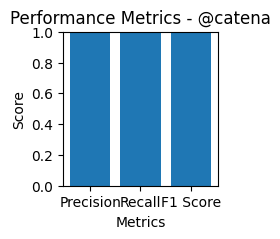

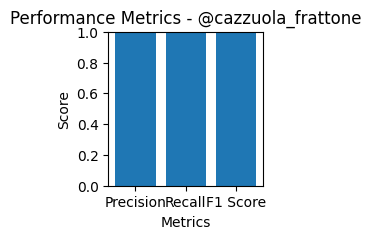

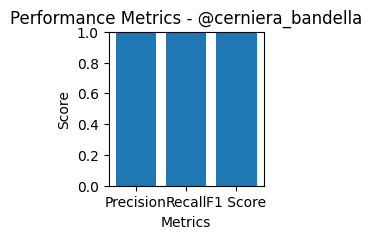

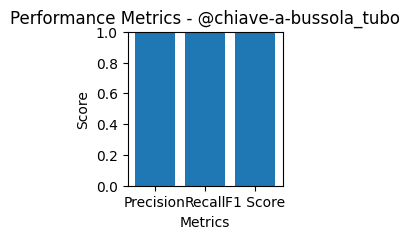

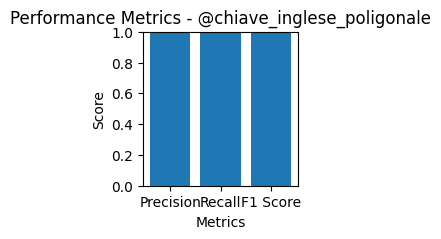

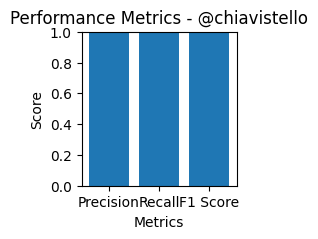

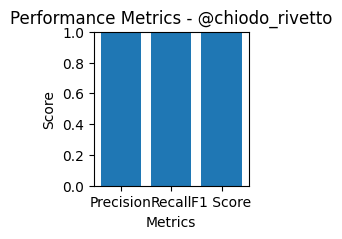

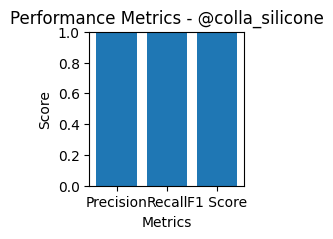

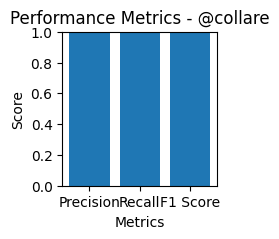

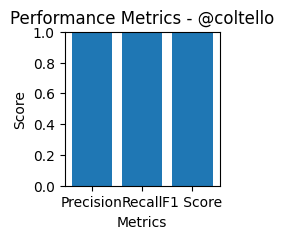

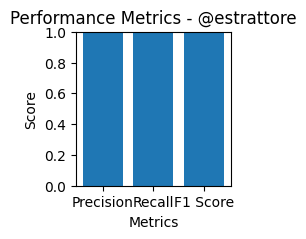

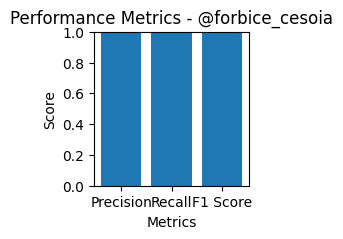

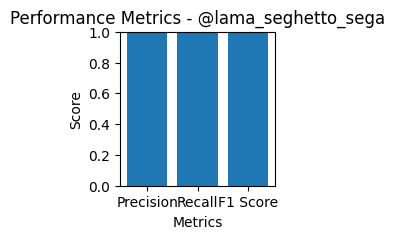

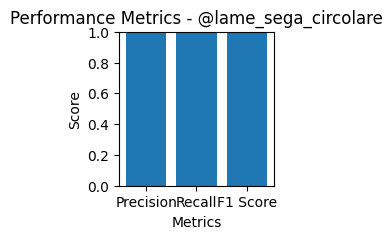

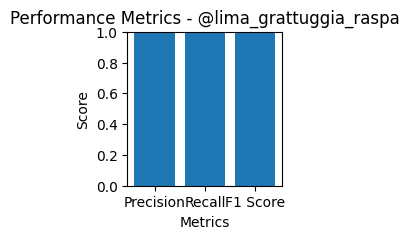

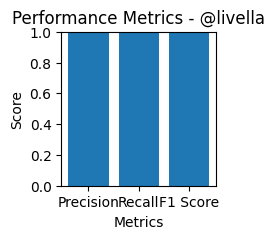

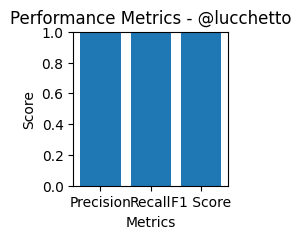

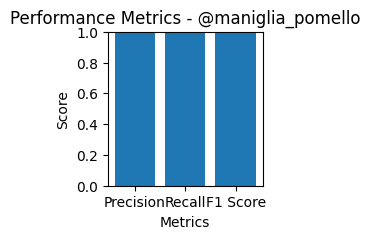

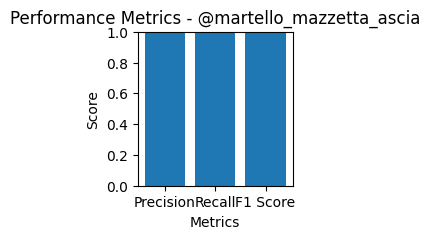

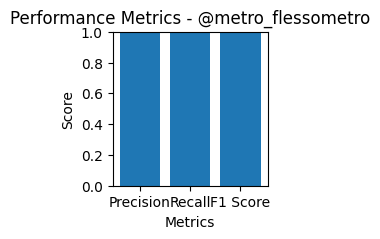

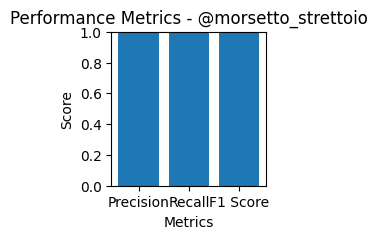

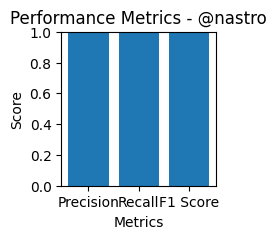

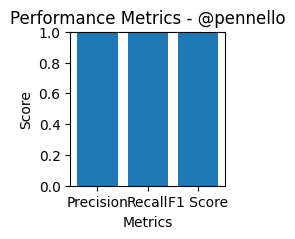

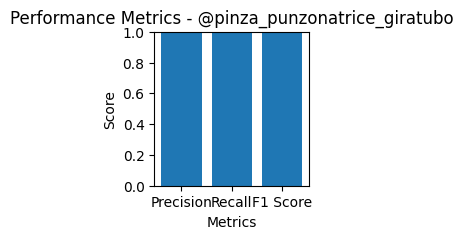

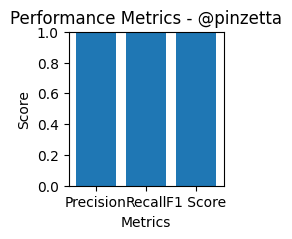

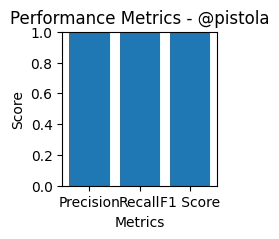

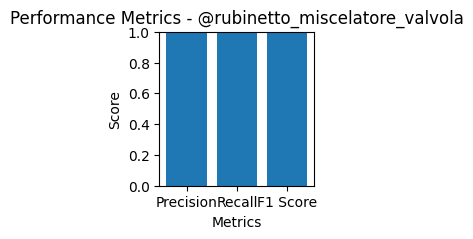

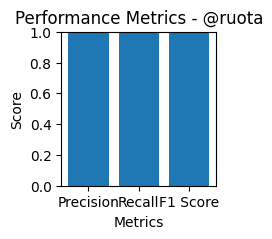

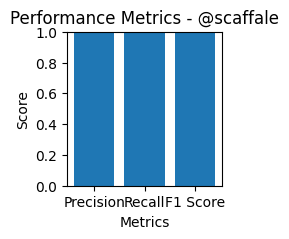

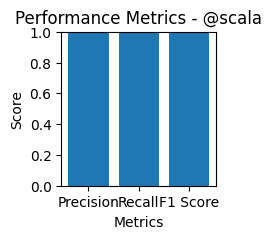

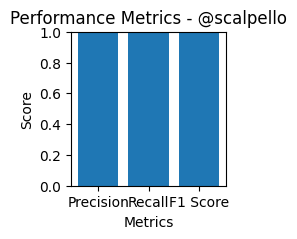

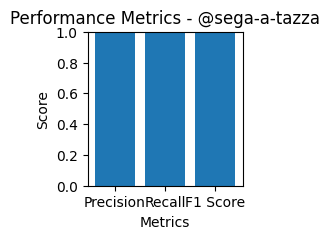

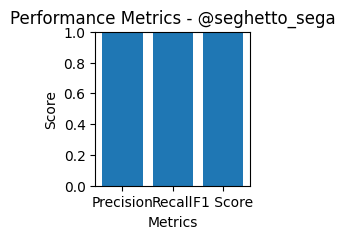

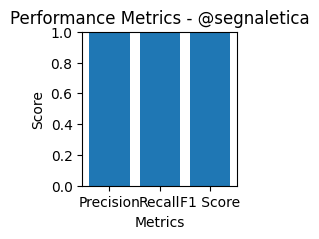

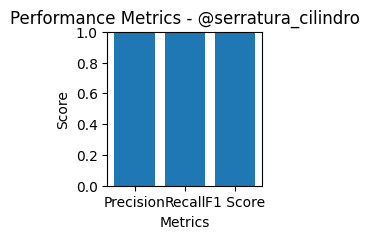

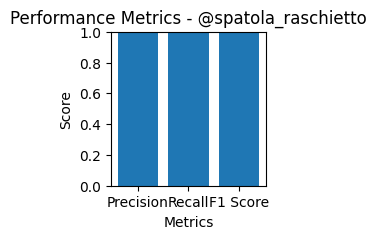

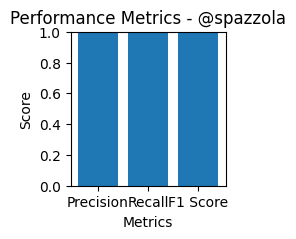

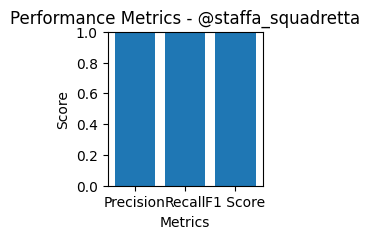

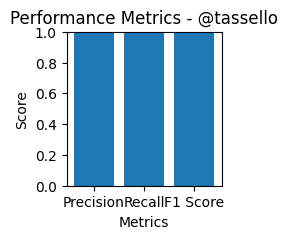

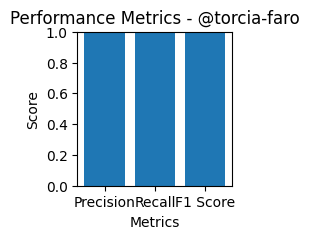

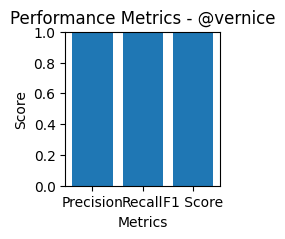

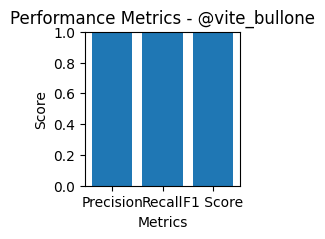

In [ ]:
# Iterate over each class and plot the performance metrics individually
for i, class_name in enumerate(class_names):
    # Create a figure for each class
    fig, ax = plt.subplots(figsize=(2, ))
    
    # Get the performance metrics for the current class
    precision = class_performance_df.loc[class_name, "Precision"]
    recall = class_performance_df.loc[class_name, "Recall"]
    f1_score = class_performance_df.loc[class_name, "F1 Score"]
    
    # Plot the performance metrics for the current class
    x = ["Precision", "Recall", "F1 Score"]
    y = [precision, recall, f1_score]
    ax.bar(x, y)
    ax.set_title(f"Performance Metrics - {class_name}")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Score")
    ax.set_ylim([0, 1])  # Set the y-axis limit to [0, 1] for consistency
    
    plt.show()


# GoogleNet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import torch.nn as nn
import torch.optim as optim
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from PIL import Image

In [ ]:
googlenet = models.googlenet(pretrained=True)

In [ ]:
num_classes = len(data_loader.dataset.dataset.classes)  
googlenet.fc = torch.nn.Linear(googlenet.fc.in_features, num_classes)
print(googlenet)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
googlenet = googlenet.to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(googlenet.parameters(), lr=0.001, momentum=0.9)
num_epochs = 15

In [ ]:
training_losses = []
googlenet.train()
# Loop over the dataset and train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in data_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = googlenet(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(data_loader.dataset)
    training_losses.append(epoch_loss)

    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f}")

In [ ]:
# Plot the loss curve
plt.plot(range(1, num_epochs+1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

In [ ]:
# Initialize counters
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0

# Evaluation loop
model.eval()
with torch.no_grad():
    for images, labels in validation_data_loader:
        # Move the images and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Update counts
        true_positives += torch.sum(predicted == labels).item()
        false_positives += torch.sum(predicted > labels).item()
        false_negatives += torch.sum(predicted < labels).item()
        true_negatives += torch.sum(predicted != labels).item()

# Calculate the accuracy
accuracy = correct_predictions / total_samples

# Calculate the precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

In [ ]:
true_negatives = total_samples - correct_predictions - false_positives - false_negatives
confusion_matrix = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])

print("Confusion Matrix:")
print(confusion_matrix)

In [ ]:
plt.figure(figsize=(6, 4))
labels = []
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()